In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score

from sklearn.dummy import DummyClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImPipeline

from sklearn.multioutput import MultiOutputClassifier

from sklearn.tree import DecisionTreeClassifier

import pickle

In [23]:
unpickleFile = open('./Data/final_data.pkl', 'rb')
df_final = pickle.load(unpickleFile, encoding='bytes')
df_final.head()

,SEX,AGE,MANEUVER,FIRST_CONTACT_POINT,LIGHTING_CONDITION,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,STREET_DIRECTION,CRASH_HOUR,CRASH_DAY_OF_WEEK,...,passengers_simple,defect_simple,vehicletype_simple,vehicleuse_simple,speedlimit_simple,weather_simple,roadcond_simple,roaddef_simple,trafficway_simple,alignment_simple
12,F,34.0,MERGING,TOTAL (ALL AREAS),DUSK,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,W,18.0,1.0,...,no passengers,defective/unknown,passenger car,personal vehicle,med,clear/unknown,dry,no road defect,not divided,straight
40,M,61.0,SLOW/STOP IN TRAFFIC,REAR-LEFT,DAYLIGHT,NO INJURY / DRIVE AWAY,FOLLOWING TOO CLOSELY,S,11.0,7.0,...,has passengers,not defective,other,personal vehicle,high,clear/unknown,dry,no road defect,divided,straight
60,F,24.0,STRAIGHT AHEAD,FRONT,"DARKNESS, LIGHTED ROAD",INJURY AND / OR TOW DUE TO CRASH,FAILING TO REDUCE SPEED TO AVOID CRASH,W,0.0,2.0,...,no passengers,defective/unknown,passenger car,personal vehicle,med,clear/unknown,dry,no road defect,not divided,straight
96,M,23.0,TURNING LEFT,SIDE-RIGHT,DAYLIGHT,NO INJURY / DRIVE AWAY,FAILING TO YIELD RIGHT-OF-WAY,W,7.0,6.0,...,no passengers,not defective,passenger car,personal vehicle,med,clear/unknown,dry,no road defect,other,straight
97,M,52.0,STRAIGHT AHEAD,OTHER,DAYLIGHT,NO INJURY / DRIVE AWAY,FAILING TO YIELD RIGHT-OF-WAY,W,7.0,6.0,...,has passengers,not defective,passenger car,personal vehicle,med,clear/unknown,dry,no road defect,other,straight


In [9]:
unpickleFile = open('./Data/clean_joined_df.pkl', 'rb')
df_clean = pickle.load(unpickleFile, encoding='bytes')
df_clean.head()

,DRIVERS_LICENSE_CLASS,SEX,AGE,SAFETY_EQUIPMENT,UNIT_TYPE,NUM_PASSENGERS,MAKE,MODEL,VEHICLE_DEFECT,VEHICLE_TYPE,...,ROAD_DEFECT,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,BEAT_OF_OCCURRENCE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,INJURY_LEVEL
0,D,M,25.0,NONE PRESENT,DRIVER,0.0,HONDA,CIVIC,UNKNOWN,PASSENGER,...,NO DEFECTS,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,NOT APPLICABLE,N,1531.0,3.0,7.0,9.0,0
1,NaN,M,37.0,SAFETY BELT USED,DRIVER,0.0,BUICK,ENCORE,NONE,PASSENGER,...,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,FAILING TO REDUCE SPEED TO AVOID CRASH,W,613.0,22.0,2.0,4.0,0
2,NaN,X,NaN,USAGE UNKNOWN,DRIVER,0.0,UNKNOWN,UNKNOWN,NONE,PASSENGER,...,NO DEFECTS,NO INJURY / DRIVE AWAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,W,821.0,5.0,1.0,11.0,0
3,NaN,X,NaN,USAGE UNKNOWN,DRIVER,0.0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN/NA,...,NO DEFECTS,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,UNABLE TO DETERMINE,N,2023.0,8.0,1.0,11.0,0
4,NaN,X,NaN,USAGE UNKNOWN,DRIVER,0.0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN/NA,...,NO DEFECTS,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,NOT APPLICABLE,S,223.0,10.0,1.0,11.0,0


In [18]:
x = list(df_clean['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)

In [19]:
y = list(df_clean['PRIM_CONTRIBUTORY_CAUSE'].value_counts()[:])

In [21]:
y

[380362,
 133013,
 132795,
 57294,
 51012,
 49737,
 43608,
 41129,
 39791,
 30957,
 25028,
 16357,
 14059,
 12537,
 7708,
 5924,
 5860,
 5605,
 5466,
 4681,
 4244,
 3208,
 2863,
 2417,
 1768,
 1673,
 1612,
 1517,
 1374,
 1008,
 851,
 586,
 498,
 449,
 425,
 384,
 139,
 92,
 80,
 35]

In [13]:
cause1, count1 = zip(df_clean['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index()

SyntaxError: unexpected EOF while parsing (<ipython-input-13-34c110e86fd9>, line 1)

C:\Users\mitch\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


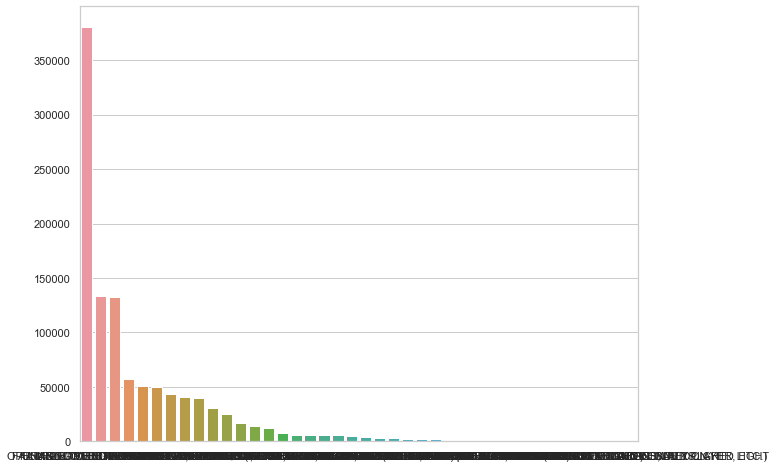

In [22]:
# graph of all crash causes
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.barplot(x, y);

C:\Users\mitch\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


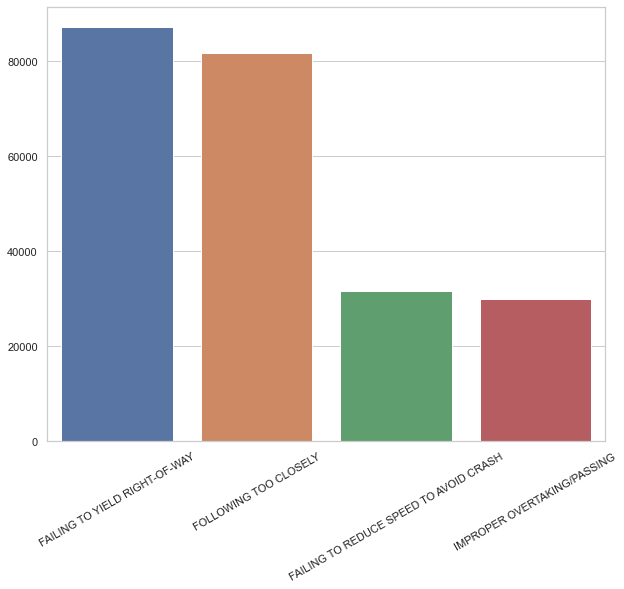

In [25]:
# top 4 crash causes
x = list(df_final['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)
y = list(df_final['PRIM_CONTRIBUTORY_CAUSE'].value_counts()[:])
plt.figure(figsize=(10,8))
ax = sns.barplot(x, y)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

In [28]:
df_final.shape[0]/df_clean.shape[0]

0.21184105809330733

In [34]:
df_final.dtypes

SEX                         object
AGE                        float64
MANEUVER                    object
FIRST_CONTACT_POINT         object
LIGHTING_CONDITION          object
CRASH_TYPE                  object
PRIM_CONTRIBUTORY_CAUSE     object
STREET_DIRECTION            object
CRASH_HOUR                 float64
CRASH_DAY_OF_WEEK          float64
CRASH_MONTH                float64
INJURY_LEVEL                object
se_simple                   object
passengers_simple           object
defect_simple               object
vehicletype_simple          object
vehicleuse_simple           object
speedlimit_simple           object
weather_simple              object
roadcond_simple             object
roaddef_simple              object
trafficway_simple           object
alignment_simple            object
dtype: object

In [35]:
df_final.LIGHTING_CONDITION.value_counts()

DAYLIGHT                  164812
DARKNESS, LIGHTED ROAD     44809
DARKNESS                    8481
DUSK                        7108
DAWN                        3434
UNKNOWN                     1870
Name: LIGHTING_CONDITION, dtype: int64

In [32]:
df_final['weather_simple'].value_counts()

clear/unknown    191536
rain              30647
snow               6793
other              1538
Name: weather_simple, dtype: int64